In [19]:
# Load our Dataset

import pandas as pd

df = pd.read_csv('D:\Public\Jyothsna\Python\Hackveda\Logistic Regression\diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[feature_cols]   # Feature / Independent Variable
y = df.Outcome   # Target / Dependent Variable

In [22]:
# Split our dataset in Training and Testing Part
# train_test_split()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 9)
(576, 8)
(192, 8)
(576,)
(192,)


In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Model Development and Prediction


from sklearn.linear_model import LogisticRegression

# Create LogisticRegression Classifier Object
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Prediction 
y_pred = logreg.predict(X_test)

y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/


# Evaluate our model using confusion matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

Text(0.5,15,'Predicted Label')

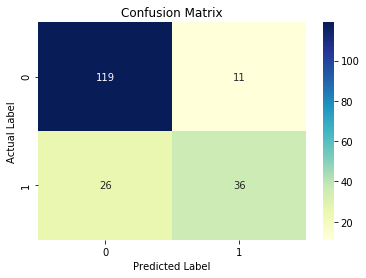

In [26]:
# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

# Generate Confusion Matrix using Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = [0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [27]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8072916666666666


In [28]:
# Precision  --> How accurate your model is
# when model makes prediction how often it it correct

print('Precision : ',metrics.precision_score(y_test,y_pred))

Precision :  0.7659574468085106


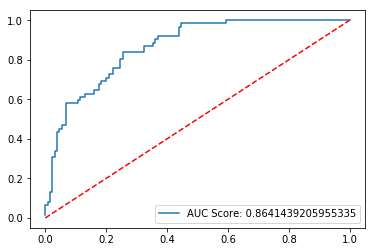

In [32]:
# ROC Curve --> Reciever Operating Characteristic

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label='AUC Score: '+str(auc))

plt.plot([0,1],[0,1],'r--')
plt.legend(loc=4)
plt.show()

In [ ]:
'''
[::,1]

Assume that your target variable is (0,1)

predict_proba --> give matirx of dimensions (N,2)

The first index refers to the probability of data belongs to Zero

The second index refers to the probability of data belongs to Ones

[::,1]  --> returns sum of both Zero and Ones

'''